Вид уравнения: x = A * y + B
Коэффициенты:
Slope: A = 1.3361405590717297 
Intercept: B = 28.82357594936719


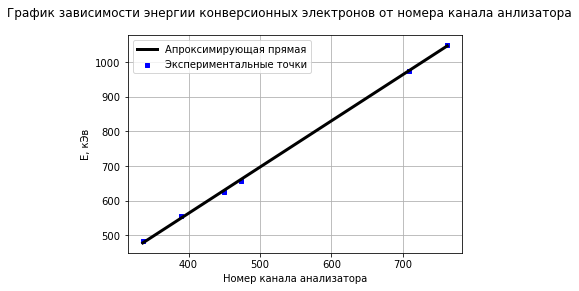

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
wookbook = openpyxl.load_workbook("таблица с данными.xlsx")
worksheet = wookbook.active
x = np.array([[i.value for i in j] for j in worksheet['A1':'A6']])
y = np.array([[i.value for i in j] for j in worksheet['B1':'B6']])
x = x.flatten()
y = y.flatten()
A = np.vstack([x, np.ones(len(x))]).T
a, b = np.linalg.lstsq(A, y, rcond=None)[0]
#Тк в библиотеке matplotlib считается стандартный МНК, у которого не учитывается погрешность экспериментальных точек, значения погрешностей по оси у не вбивались(в практикуме их тоже не было, тк прямые измерения были довольно-таки точными)
print('Вид уравнения: x = A * y + B' '\n' 'Коэффициенты:' '\n' "Slope: A =",a, '\n' 'Intercept: B =',b)
plt.plot(x, (a * x + b), color="black", linewidth = 3, label='Апроксимирующая прямая')
plt.scatter(x, y, s=15, color="blue", marker="s", label='Экспериментальные точки')
#plt.errorbar(x, y, yerr, fmt=".", elinewidth=1)
plt.legend()
plt.xlabel('Номер канала анализатора')
plt.ylabel('E, кЭв')
plt.suptitle('График зависимости энергии конверсионных электронов от номера канала анлизатора')
plt.grid()
plt.show()